In [1]:
conda install pandas

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install numpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install matplotlib

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings

warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [8]:
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

In [11]:
X_df = df.drop("charges", axis=1)
X_df.shape

(1338, 6)

In [12]:
y_df = df["charges"]
y_df.shape

(1338,)

2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

In [13]:
#Total charges of insuarance
df["charges"].sum()

17755824.990759

In [14]:
#best region in terms of insuarance sales
best_region = df.groupby(["region"]).sum().sort_values(by = "charges")
best_region

,age,bmi,children,charges
region,,,,
southwest,12823,9943.900,371,4.012755e+06
northwest,12739,9489.930,373,4.035712e+06
northeast,12723,9452.215,339,4.343669e+06
southeast,14174,12141.580,382,5.363690e+06


3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

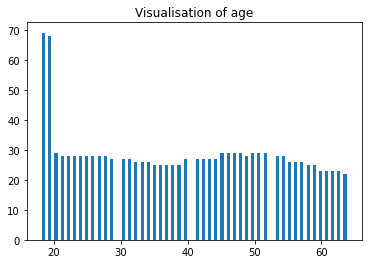

In [15]:
plt.hist(df["age"], bins = 50, histtype = "bar", rwidth = 0.5)
plt.title ("Visualisation of age")
plt.show()

Majority of the people recorded, were below the age of 20. Above 20years, there was a balance in the recorded ages.

4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

In [16]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
numerical_continuous = []
for column in df.columns:
    if df[column].dtypes != "object":
        if df[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove("charges")
numerical_continuous

['age', 'bmi']

In [18]:
numerical_discreet = []
for column in df.columns:
    if df[column].dtypes != "object":
        if df[column].nunique() < 10:
            numerical_discreet.append(column)
numerical_discreet

['children']

5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

<AxesSubplot:>

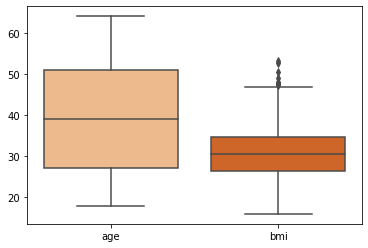

In [19]:
sns.boxplot(data = df[numerical_continuous], orient = "v", palette = "Oranges")

<AxesSubplot:>

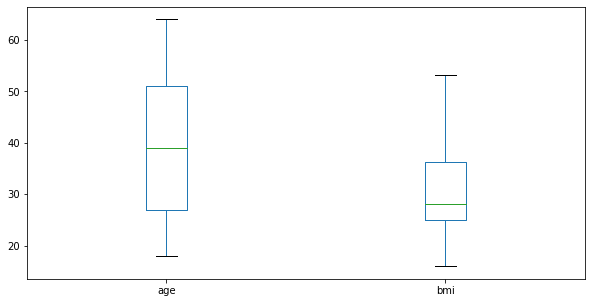

In [20]:
threshold = 0.375
zscore = np.abs(stats.zscore(df[["bmi"]]))
df[(zscore > threshold).all(axis = 1)][numerical_continuous].plot(kind = "box", figsize = (10,5))

6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

In [21]:
df = df[(zscore > threshold).all(axis = 1)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1335,18,female,36.850,0,no,southeast,1629.83350


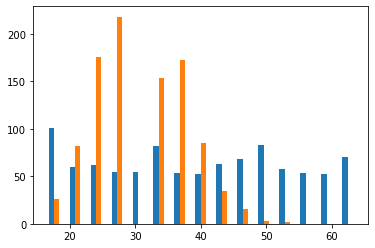

In [22]:
plt.hist(df[numerical_continuous], bins = 15, rwidth = 0.5)
plt.show()

7. Isolate all the categorical column names into a list named ‘categorical’

In [23]:
categorical = []
for column in df.columns:
    if df[column].dtypes == "object":
        categorical.append(column)
categorical

['sex', 'smoker', 'region']

8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

<AxesSubplot:>

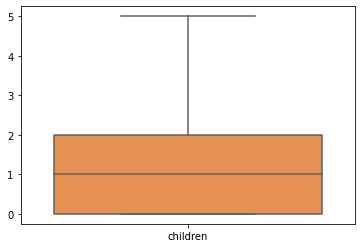

In [24]:
sns.boxplot(data = df[numerical_discreet], orient = "v", palette = "Oranges")

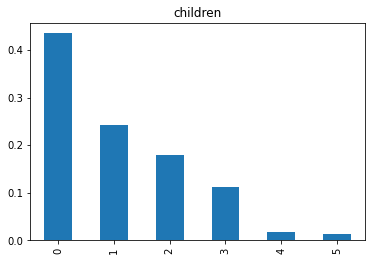

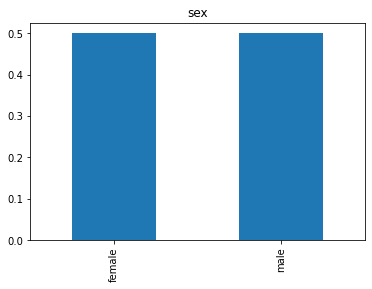

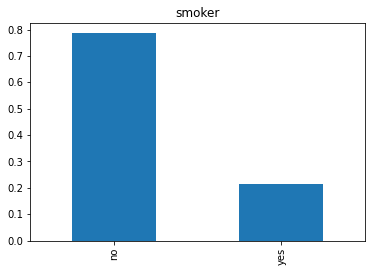

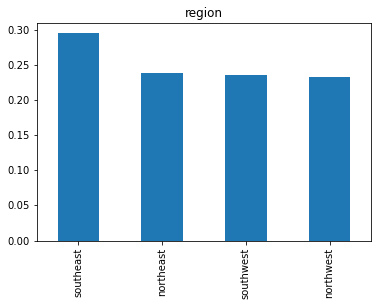

In [25]:
for column in numerical_discreet + categorical:
    (df[column].value_counts()/df.shape[0]).plot(kind = "bar")
    plt.title(column)
    plt.show()


In [26]:
df["children"] = df["children"].replace([3,4,5], "Rare")
df["children"]

0          0
1          1
2       Rare
3          0
5          0
        ... 
1330       2
1331       0
1332    Rare
1335       0
1336       0
Name: children, Length: 968, dtype: object

9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [37]:
#mode
#median
#mean

encoded_features = {}
for column in numerical_discreet + categorical:
    encoded_features[column] = df.groupby([column])["charges"].median().to_dict()
    df[column] = df[column].map(encoded_features[column])
    
    


10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [38]:
X = df.drop("charges", axis =1)
y = df["charges"]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
model = LinearRegression()
rfe = RFE(model, 5)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age          True
sex          True
bmi          True
children    False
smoker       True
region       True
dtype: bool


8) 1.Convert the target labels to their respective log values and give 2 reasons why this step may be useful as we train the machine learning model. (Explain in a markdown cell.)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

In [31]:
y_log = np.log(y)
y_log

0       9.734176
1       7.453302
2       8.400538
3       9.998092
5       8.231275
          ...   
1330    9.443764
1331    9.286925
1332    9.342393
1335    7.396233
1336    7.604867
Name: charges, Length: 968, dtype: float64

Handles any outliers in the target coumn.

8) 2.Slice the selected feature columns and the labels into the training and testing set. Also ensure your features are normalized.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_log, test_size = 0.2, random_state = 0)

8) 3.Use at least 4 different regression based machine learning methods and use the training and testing cross accuracy and divergence to identify the best model

In [40]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
regular_reg = ElasticNet()
dt_reg = DecisionTreeRegressor(random_state = 0)
bag_reg = BaggingRegressor(random_state = 0) 
boost_reg = AdaBoostRegressor(random_state = 0)

models = {'ElasticNet': regular_reg, 'DecisionTreeRegressor': dt_reg, 'BaggingRegressor': bag_reg, 
          'AdaBoostRegressor': boost_reg}

In [42]:
def cross_valid(models, X, y, process = 'Training'):
    print(f'Process: {process}')
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv = 5)
        print(f'Model: {model_name}')
        print(f'Cross validation mean score: {round(np.mean(scores), 4)}')
        print(f'Cross validation deviation: {round(np.std(scores), 4)}')
        print('\n')

In [43]:
cross_valid(models, X_train, y_train, process = 'Training')

Process: Training
Model: ElasticNet
Cross validation mean score: 0.1033
Cross validation deviation: 0.0263


Model: DecisionTreeRegressor
Cross validation mean score: 0.603
Cross validation deviation: 0.039


Model: BaggingRegressor
Cross validation mean score: 0.7559
Cross validation deviation: 0.0252


Model: AdaBoostRegressor
Cross validation mean score: 0.7403
Cross validation deviation: 0.0312




In [44]:
cross_valid(models, X_test, y_test, process = 'Testing')

Process: Testing
Model: ElasticNet
Cross validation mean score: 0.0684
Cross validation deviation: 0.015


Model: DecisionTreeRegressor
Cross validation mean score: 0.5241
Cross validation deviation: 0.2098


Model: BaggingRegressor
Cross validation mean score: 0.6946
Cross validation deviation: 0.1292


Model: AdaBoostRegressor
Cross validation mean score: 0.6887
Cross validation deviation: 0.1018




8) 4. After identifying the best model, train it with the training data again. Using at least 3 model evaluation metrics in regression, evaluate the models training and testing score. Also ensure as you test the models, the predicted and actual targets have been converted back to the original values using antilog. (Hint: Antilog function is equal to Exponential)

In [45]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(random_state=0)

In [46]:
def model_evaluation(model, X, y):
    y_predict = np.exp(model.predict(X))
    y = np.exp(y)
    print(f'Mean Squared Error: {mean_squared_error(y, y_predict)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y, y_predict)}')
    print(f'R2 Score: {r2_score(y, y_predict)}')

In [47]:
model_evaluation(bag_reg, X_train, y_train)

Mean Squared Error: 6516459.587248233
Mean Absolute Error: 1136.6169348240364
R2 Score: 0.9563185771898398


In [48]:
model_evaluation(bag_reg, X_test, y_test)

Mean Squared Error: 18879664.249590866
Mean Absolute Error: 2302.334042744642
R2 Score: 0.867393735541934
